#### Determine en una sola tabla la media, desviación estándar y la mediana (percentil 50) para el ancho del pétalo por cada tipo de flor para aquellos registros cuyo ancho del sépalo es mayor o igual a 3.5 y el largo del sépalo es mayor que 5. 
#### Calcule el número de registros que se utilizaron para obtener los resultados del problema 1. 
Agregue una nueva columna al DataFrame generado al problema 1, que sea resultado de estandarizar los valores del ancho del pétalo para cada registro. Denomine a dicha columna “petal.width.st” y calcúlela de la siguiente manera:

In [1]:
# importar librerias y leer el archivo

import pandas as pd
import numpy as np
iris = pd.read_csv('iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [2]:
# Determinar en una tabla la media, mediana (percentil50), desviación estándar para el ancho de del petalo (petal_width) para cada especie (variety)
# para aquellos registros cuyo ancho del sépalo sea mayor o igual a 3.5 y el largo sea mayor que 5.0

# convertir sepal.lenght y sepal.width a float
iris['sepal.length'] = iris['sepal.length'].astype(float)
iris['sepal.width'] = iris['sepal.width'].astype(float)
iris['petal.width'] = iris['petal.width'].astype(float)

# filtrar los registros

iris_filtrado = iris[(iris['sepal.length'] >= 5.0) & (iris['sepal.width'] >= 3.5)]
iris_stats = iris_filtrado.groupby('variety').agg({'petal.width': ['mean', 'median', 'std']})
iris_stats


petal.width                 
                 mean median       std
variety                               
Setosa       0.285000   0.25  0.118210
Virginica    2.233333   2.20  0.251661

In [3]:
# calcular el numero de registros que se utilizaron para calcular la media, mediana y desviación estándar
iris_filtrado = iris[(iris['sepal.length'] >= 5.0) & (iris['sepal.width'] >= 3.5)]
registros = iris_filtrado.groupby('variety').agg({'petal.width': ['count']})
registros


,petal.width
,count
variety,
Setosa,20
Virginica,3


In [4]:
# agregar nueva columna con el resultado de estandarizar el ancho del petalo y llamarla "petal.width.st"

std = (iris['petal.width'] - iris['petal.width'].mean()) / iris['petal.width'].std()
std = std.rename('petal.width.st')
iris = pd.concat([iris, std], axis=1)
iris

,sepal.length,sepal.width,petal.length,petal.width,variety,petal.width.st
0,5.1,3.5,1.4,0.2,Setosa,-1.311052
1,4.9,3.0,1.4,0.2,Setosa,-1.311052
2,4.7,3.2,1.3,0.2,Setosa,-1.311052
3,4.6,3.1,1.5,0.2,Setosa,-1.311052
4,5.0,3.6,1.4,0.2,Setosa,-1.311052
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,1.443994
146,6.3,2.5,5.0,1.9,Virginica,0.919223
147,6.5,3.0,5.2,2.0,Virginica,1.050416
148,6.2,3.4,5.4,2.3,Virginica,1.443994


In [5]:
# cambiar nombre de las columnas "Variety" y "petal.width.st" a "Variedad" y "Ancho est. Pétalo"

iris = iris.rename(columns={'variety': 'Variedad', 'petal.width.st': 'Ancho est. Pétalo'})
iris

,sepal.length,sepal.width,petal.length,petal.width,Variedad,Ancho est. Pétalo
0,5.1,3.5,1.4,0.2,Setosa,-1.311052
1,4.9,3.0,1.4,0.2,Setosa,-1.311052
2,4.7,3.2,1.3,0.2,Setosa,-1.311052
3,4.6,3.1,1.5,0.2,Setosa,-1.311052
4,5.0,3.6,1.4,0.2,Setosa,-1.311052
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,1.443994
146,6.3,2.5,5.0,1.9,Virginica,0.919223
147,6.5,3.0,5.2,2.0,Virginica,1.050416
148,6.2,3.4,5.4,2.3,Virginica,1.443994


In [6]:
# Exportar el dataframe a un archivo .csv llamado "iris2.csv"

iris.to_csv('iris2.csv')

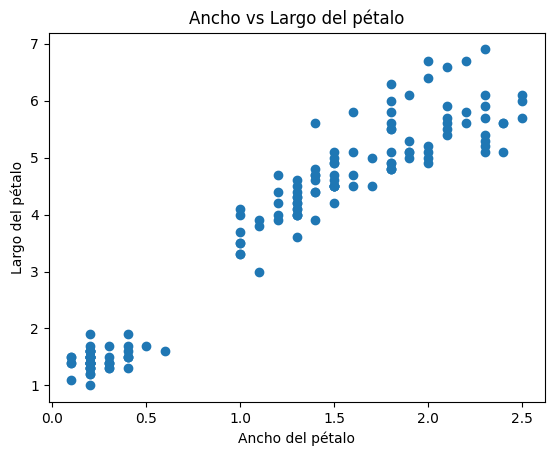

In [7]:
# crear grafica de dispersion para la base original que relacione la variable "petal.width" y "petal.length"

import matplotlib.pyplot as plt
plt.scatter(iris['petal.width'], iris['petal.length'])
plt.xlabel('Ancho del pétalo')
plt.ylabel('Largo del pétalo')
plt.title('Ancho vs Largo del pétalo')
plt.show()